In [74]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [75]:
#read the data
data = pd.read_csv('AirPassengers.csv')
data.tail()

,TravelDate,Passengers
139,8/1/1960,606
140,9/1/1960,508
141,10/1/1960,461
142,11/1/1960,390
143,12/1/1960,432


In [76]:
#split the date into month & year
from datetime import datetime

#save the original data to a container
con=data['TravelDate']

# change the format of TravelDate to datetime
data['TravelDate']=pd.to_datetime(data['TravelDate'])
data.set_index('TravelDate', inplace=True)
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='TravelDate', length=144, freq=None)

In [77]:
#convert to time series format:
ts = data['Passengers']

# check the first 10 rows
ts.head(10)

TravelDate
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: Passengers, dtype: int64

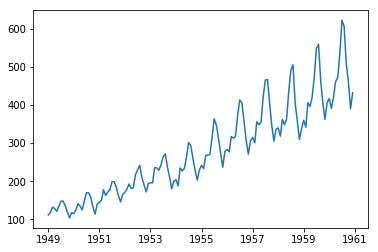

In [93]:
#plot the number of air passengers over time
plt.plot(ts)

In [30]:
# need to import library called 'statsmodels' to perform forecasting
!pip install statsmodels

In [89]:
#use Exponential Smoothing algorithm to forecast
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#seasonal = 'multiply', 'seasonal_periods' = 12 because monthly
model = ExponentialSmoothing(ts,seasonal='mul', seasonal_periods=12)

C:\Users\labclass\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [90]:
# fit model
model_fit = model.fit()

In [94]:
#make prediction for the next 24 months
prediction = model_fit.predict(start='1961-01-01', end='1962-12-01')
prediction

1961-01-01    438.239961
1961-02-01    409.808001
1961-03-01    452.865110
1961-04-01    483.577229
1961-05-01    489.577809
1961-06-01    552.228885
1961-07-01    637.750992
1961-08-01    626.433939
1961-09-01    521.914278
1961-10-01    464.339327
1961-11-01    392.028873
1961-12-01    428.203239
1962-01-01    438.239961
1962-02-01    409.808001
1962-03-01    452.865110
1962-04-01    483.577229
1962-05-01    489.577809
1962-06-01    552.228885
1962-07-01    637.750992
1962-08-01    626.433939
1962-09-01    521.914278
1962-10-01    464.339327
1962-11-01    392.028873
1962-12-01    428.203239
Freq: MS, dtype: float64

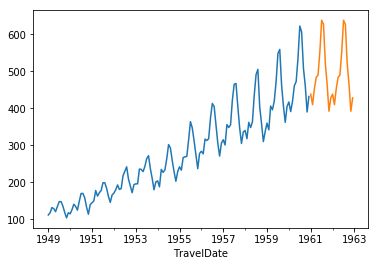

In [95]:
#plot the data
ts.plot()
prediction.plot()
